# Decessi mediani

Decessi mediani nell'ultima settimana.

> Max Pierini

***

Fonte dati [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

In [2]:
df = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    index_col=['Country/Region', 'Province/State']
).drop(['Lat', 'Long'], axis='columns')

In [3]:
c = df.groupby('Country/Region').sum()

In [4]:
ct = c.transpose()

In [5]:
ct.index = pd.to_datetime(ct.index)

In [6]:
ct.index.name = 'date'

In [7]:
ctd = ct.diff()

In [8]:
ctd_last_week = ctd.iloc[-7:]

In [9]:
ctd_last_week = ctd_last_week.melt()

In [10]:
ctd_last_week['median'] = 0

In [11]:
for i in ctd_last_week.index:
    country = ctd_last_week.loc[i]['Country/Region']
    med = ctd_last_week[ctd_last_week["Country/Region"]==country].median().value
    ctd_last_week.loc[i, 'median'] = med

In [12]:
ctd_last_week['cat'] = pd.cut(
    ctd_last_week['median'], 
    bins=[-1,1,10,100,1000,np.inf],
    labels=[0, 10, 100, 1000, '1000+']
)

In [13]:
print("NAs check:")
ctd_last_week[ctd_last_week['cat'].isna()].sum()

NAs check:


Country/Region    0.0
value             0.0
median            0.0
cat               0.0
dtype: float64

***

# Maggiore di 0

In [14]:
_df_0 = ctd_last_week[ctd_last_week['cat']>0].sort_values(by='median')

In [15]:
perc = _df_0['Country/Region'].unique().size / ctd_last_week['Country/Region'].unique().size
display(Markdown(f"""
Nazioni: {_df_0['Country/Region'].unique().size} su {ctd_last_week['Country/Region'].unique().size}
({perc:.1%})
"""))


Nazioni: 85 su 188
(45.2%)


In [16]:
print("IN ORDINE per mediana:")
display(Markdown(
    _df_0.groupby('Country/Region')[['value']].median().sort_values(by='value').to_html()
))

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Afghanistan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Korea, South</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kosovo</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Guyana</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>United Arab Emirates</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Bahrain</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Ireland</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Azerbaijan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Malaysia</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Jamaica</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Syria</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Montenegro</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Kyrgyzstan</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>El Salvador</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Albania</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Angola</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Kuwait</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Croatia</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Uzbekistan</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>North Macedonia</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Dominican Republic</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Bosnia and Herzegovina</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Kenya</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Georgia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Greece</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Austria</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Libya</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Algeria</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Belarus</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Armenia</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Venezuela</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Bulgaria</th>
      <td>7.0</td>
    </tr>
    <tr>
      <th>Oman</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Lebanon</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>West Bank and Gaza</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Ethiopia</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Panama</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Guatemala</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Pakistan</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Egypt</th>
      <td>11.0</td>
    </tr>
    <tr>
      <th>Honduras</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Portugal</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Jordan</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Nepal</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Moldova</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Belgium</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Costa Rica</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Netherlands</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>Paraguay</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Hungary</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Tunisia</th>
      <td>22.0</td>
    </tr>
    <tr>
      <th>Canada</th>
      <td>22.0</td>
    </tr>
    <tr>
      <th>Bangladesh</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>Saudi Arabia</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>Italy</th>
      <td>28.0</td>
    </tr>
    <tr>
      <th>Bolivia</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>Burma</th>
      <td>32.0</td>
    </tr>
    <tr>
      <th>Ecuador</th>
      <td>34.0</td>
    </tr>
    <tr>
      <th>Czechia</th>
      <td>36.0</td>
    </tr>
    <tr>
      <th>Israel</th>
      <td>39.0</td>
    </tr>
    <tr>
      <th>Morocco</th>
      <td>41.0</td>
    </tr>
    <tr>
      <th>Chile</th>
      <td>52.0</td>
    </tr>
    <tr>
      <th>Poland</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Romania</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Turkey</th>
      <td>56.0</td>
    </tr>
    <tr>
      <th>Iraq</th>
      <td>65.0</td>
    </tr>
    <tr>
      <th>France</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>76.0</td>
    </tr>
    <tr>
      <th>Philippines</th>
      <td>83.0</td>
    </tr>
    <tr>
      <th>Peru</th>
      <td>92.0</td>
    </tr>
    <tr>
      <th>Ukraine</th>
      <td>92.0</td>
    </tr>
    <tr>
      <th>Indonesia</th>
      <td>98.0</td>
    </tr>
    <tr>
      <th>South Africa</th>
      <td>126.0</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>126.0</td>
    </tr>
    <tr>
      <th>Colombia</th>
      <td>165.0</td>
    </tr>
    <tr>
      <th>Russia</th>
      <td>184.0</td>
    </tr>
    <tr>
      <th>Iran</th>
      <td>230.0</td>
    </tr>
    <tr>
      <th>Mexico</th>
      <td>378.0</td>
    </tr>
    <tr>
      <th>Argentina</th>
      <td>399.0</td>
    </tr>
    <tr>
      <th>US</th>
      <td>705.0</td>
    </tr>
    <tr>
      <th>Brazil</th>
      <td>729.0</td>
    </tr>
    <tr>
      <th>India</th>
      <td>926.0</td>
    </tr>
  </tbody>
</table>

In [17]:
print("IN ORDINE per nazione:")
display(Markdown(
    _df_0.groupby('Country/Region')[['value']].median().sort_values(by='Country/Region').to_html()
))

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Afghanistan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Albania</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Algeria</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Angola</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Argentina</th>
      <td>399.0</td>
    </tr>
    <tr>
      <th>Armenia</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Austria</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Azerbaijan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Bahrain</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Bangladesh</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>Belarus</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Belgium</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Bolivia</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>Bosnia and Herzegovina</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Brazil</th>
      <td>729.0</td>
    </tr>
    <tr>
      <th>Bulgaria</th>
      <td>7.0</td>
    </tr>
    <tr>
      <th>Burma</th>
      <td>32.0</td>
    </tr>
    <tr>
      <th>Canada</th>
      <td>22.0</td>
    </tr>
    <tr>
      <th>Chile</th>
      <td>52.0</td>
    </tr>
    <tr>
      <th>Colombia</th>
      <td>165.0</td>
    </tr>
    <tr>
      <th>Costa Rica</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Croatia</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Czechia</th>
      <td>36.0</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Dominican Republic</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Ecuador</th>
      <td>34.0</td>
    </tr>
    <tr>
      <th>Egypt</th>
      <td>11.0</td>
    </tr>
    <tr>
      <th>El Salvador</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Ethiopia</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>France</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Georgia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Greece</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Guatemala</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Guyana</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Honduras</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Hungary</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>India</th>
      <td>926.0</td>
    </tr>
    <tr>
      <th>Indonesia</th>
      <td>98.0</td>
    </tr>
    <tr>
      <th>Iran</th>
      <td>230.0</td>
    </tr>
    <tr>
      <th>Iraq</th>
      <td>65.0</td>
    </tr>
    <tr>
      <th>Ireland</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Israel</th>
      <td>39.0</td>
    </tr>
    <tr>
      <th>Italy</th>
      <td>28.0</td>
    </tr>
    <tr>
      <th>Jamaica</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Jordan</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Kenya</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Korea, South</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kosovo</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kuwait</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Kyrgyzstan</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Lebanon</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Libya</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Malaysia</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Mexico</th>
      <td>378.0</td>
    </tr>
    <tr>
      <th>Moldova</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Montenegro</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Morocco</th>
      <td>41.0</td>
    </tr>
    <tr>
      <th>Nepal</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Netherlands</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>North Macedonia</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Oman</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Pakistan</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Panama</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Paraguay</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Peru</th>
      <td>92.0</td>
    </tr>
    <tr>
      <th>Philippines</th>
      <td>83.0</td>
    </tr>
    <tr>
      <th>Poland</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Portugal</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Romania</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Russia</th>
      <td>184.0</td>
    </tr>
    <tr>
      <th>Saudi Arabia</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>South Africa</th>
      <td>126.0</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>126.0</td>
    </tr>
    <tr>
      <th>Syria</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Tunisia</th>
      <td>22.0</td>
    </tr>
    <tr>
      <th>Turkey</th>
      <td>56.0</td>
    </tr>
    <tr>
      <th>US</th>
      <td>705.0</td>
    </tr>
    <tr>
      <th>Ukraine</th>
      <td>92.0</td>
    </tr>
    <tr>
      <th>United Arab Emirates</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>76.0</td>
    </tr>
    <tr>
      <th>Uzbekistan</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Venezuela</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>West Bank and Gaza</th>
      <td>8.0</td>
    </tr>
  </tbody>
</table>

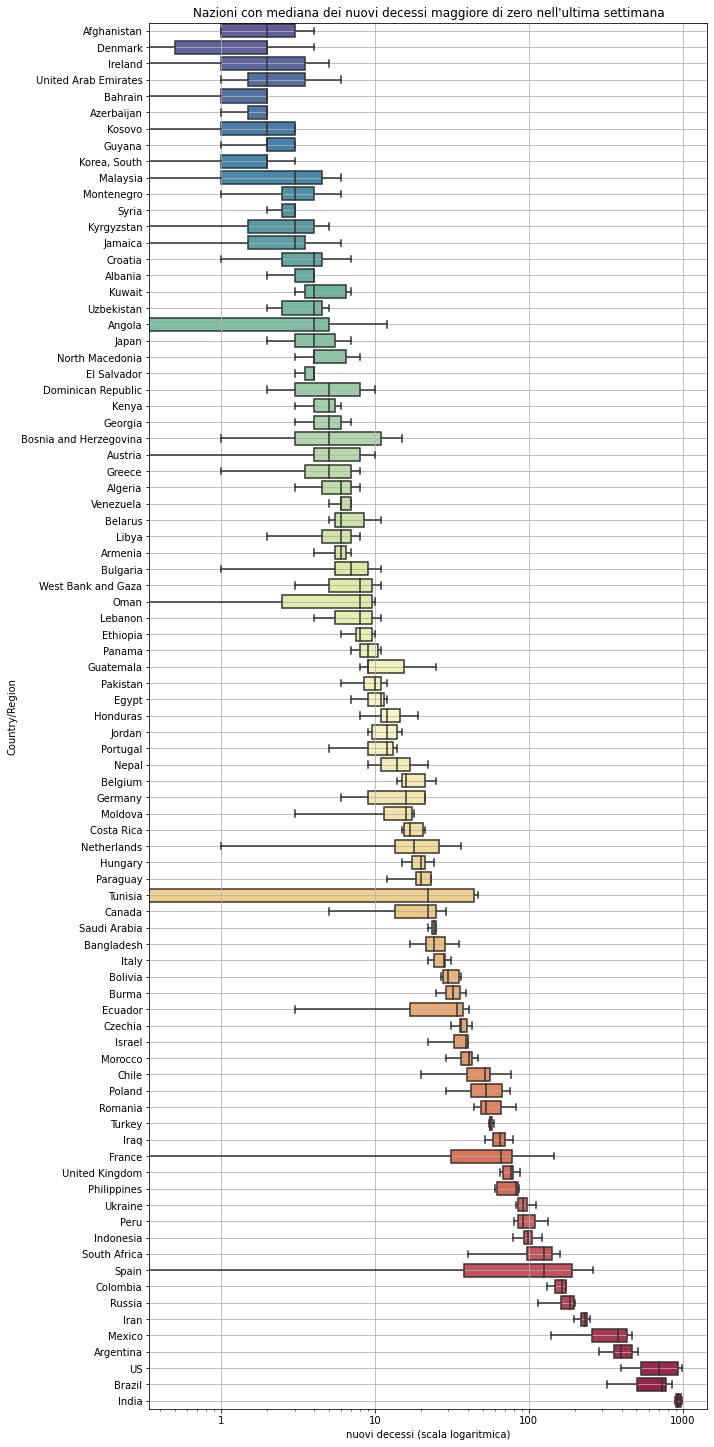

In [18]:
if _df_0.size:

    fig, ax = plt.subplots(figsize=(10, max(2, _df_0['Country/Region'].unique().size*.3)))

    g = sns.boxplot(
        data=_df_0,
        orient='h',
        x='value', y='Country/Region',
        palette="Spectral_r",
        showfliers=False,
        ax=ax
    )

    ax.set_xscale('log')
    ax.set_xticks([1, 10, 100, 1000])
    ax.set_xticklabels(['1', '10', '100', '1000'])

    ax.set_xlabel("nuovi decessi (scala logaritmica)")
    ax.set_title("Nazioni con mediana dei nuovi decessi maggiore di zero nell'ultima settimana")

    ax.grid()

***

# tra 1 e 10


Nazioni: 41 su 188
(21.8%)
    

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Afghanistan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Albania</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Algeria</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Angola</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Armenia</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Austria</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Azerbaijan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Bahrain</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Belarus</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Bosnia and Herzegovina</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Bulgaria</th>
      <td>7.0</td>
    </tr>
    <tr>
      <th>Croatia</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Dominican Republic</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>El Salvador</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Ethiopia</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Georgia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Greece</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Guatemala</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Guyana</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Ireland</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Jamaica</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Kenya</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Korea, South</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kosovo</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kuwait</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Kyrgyzstan</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Lebanon</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Libya</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Malaysia</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Montenegro</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>North Macedonia</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Oman</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Pakistan</th>
      <td>10.0</td>
    </tr>
    <tr>
      <th>Panama</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Syria</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>United Arab Emirates</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Uzbekistan</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Venezuela</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>West Bank and Gaza</th>
      <td>8.0</td>
    </tr>
  </tbody>
</table>

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Afghanistan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>United Arab Emirates</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Kosovo</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Korea, South</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Guyana</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Bahrain</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Ireland</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Azerbaijan</th>
      <td>2.0</td>
    </tr>
    <tr>
      <th>Syria</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Malaysia</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Jamaica</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Montenegro</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Kyrgyzstan</th>
      <td>3.0</td>
    </tr>
    <tr>
      <th>Kuwait</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Japan</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>North Macedonia</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Angola</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Albania</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>El Salvador</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Croatia</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Uzbekistan</th>
      <td>4.0</td>
    </tr>
    <tr>
      <th>Georgia</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Dominican Republic</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Austria</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Kenya</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Bosnia and Herzegovina</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Greece</th>
      <td>5.0</td>
    </tr>
    <tr>
      <th>Libya</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Belarus</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Algeria</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Venezuela</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Armenia</th>
      <td>6.0</td>
    </tr>
    <tr>
      <th>Bulgaria</th>
      <td>7.0</td>
    </tr>
    <tr>
      <th>Oman</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Ethiopia</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Lebanon</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>West Bank and Gaza</th>
      <td>8.0</td>
    </tr>
    <tr>
      <th>Panama</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Guatemala</th>
      <td>9.0</td>
    </tr>
    <tr>
      <th>Pakistan</th>
      <td>10.0</td>
    </tr>
  </tbody>
</table>

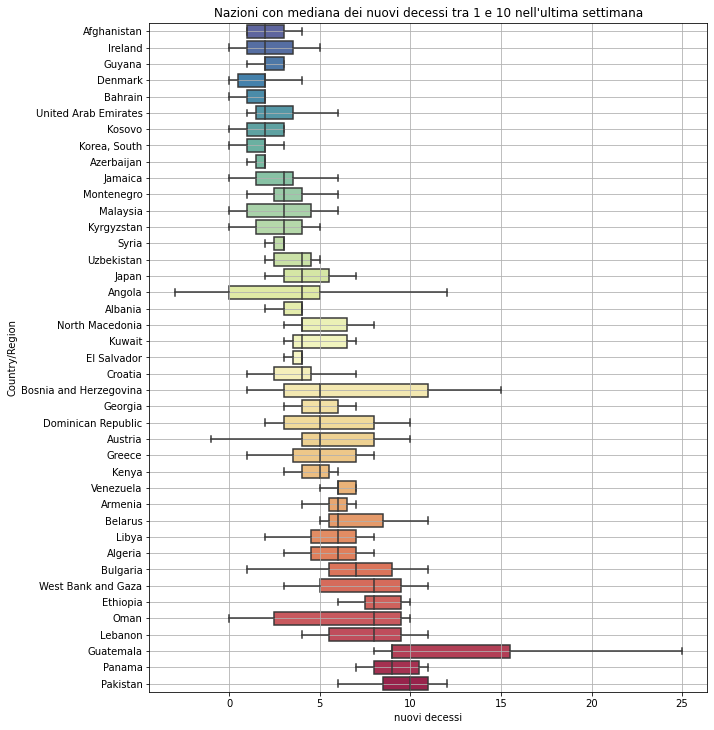

***

# tra 10 e 100


Nazioni: 34 su 188
(18.1%)
    

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Bangladesh</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>Belgium</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Bolivia</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>Burma</th>
      <td>32.0</td>
    </tr>
    <tr>
      <th>Canada</th>
      <td>22.0</td>
    </tr>
    <tr>
      <th>Chile</th>
      <td>52.0</td>
    </tr>
    <tr>
      <th>Costa Rica</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Czechia</th>
      <td>36.0</td>
    </tr>
    <tr>
      <th>Ecuador</th>
      <td>34.0</td>
    </tr>
    <tr>
      <th>Egypt</th>
      <td>11.0</td>
    </tr>
    <tr>
      <th>France</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Honduras</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Hungary</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Indonesia</th>
      <td>98.0</td>
    </tr>
    <tr>
      <th>Iraq</th>
      <td>65.0</td>
    </tr>
    <tr>
      <th>Israel</th>
      <td>39.0</td>
    </tr>
    <tr>
      <th>Italy</th>
      <td>28.0</td>
    </tr>
    <tr>
      <th>Jordan</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Moldova</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Morocco</th>
      <td>41.0</td>
    </tr>
    <tr>
      <th>Nepal</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Netherlands</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>Paraguay</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Peru</th>
      <td>92.0</td>
    </tr>
    <tr>
      <th>Philippines</th>
      <td>83.0</td>
    </tr>
    <tr>
      <th>Poland</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Portugal</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Romania</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Saudi Arabia</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>Tunisia</th>
      <td>22.0</td>
    </tr>
    <tr>
      <th>Turkey</th>
      <td>56.0</td>
    </tr>
    <tr>
      <th>Ukraine</th>
      <td>92.0</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>76.0</td>
    </tr>
  </tbody>
</table>

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Egypt</th>
      <td>11.0</td>
    </tr>
    <tr>
      <th>Jordan</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Portugal</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Honduras</th>
      <td>12.0</td>
    </tr>
    <tr>
      <th>Nepal</th>
      <td>14.0</td>
    </tr>
    <tr>
      <th>Belgium</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Moldova</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Germany</th>
      <td>16.0</td>
    </tr>
    <tr>
      <th>Costa Rica</th>
      <td>17.0</td>
    </tr>
    <tr>
      <th>Netherlands</th>
      <td>18.0</td>
    </tr>
    <tr>
      <th>Paraguay</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Hungary</th>
      <td>20.0</td>
    </tr>
    <tr>
      <th>Canada</th>
      <td>22.0</td>
    </tr>
    <tr>
      <th>Tunisia</th>
      <td>22.0</td>
    </tr>
    <tr>
      <th>Bangladesh</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>Saudi Arabia</th>
      <td>24.0</td>
    </tr>
    <tr>
      <th>Italy</th>
      <td>28.0</td>
    </tr>
    <tr>
      <th>Bolivia</th>
      <td>30.0</td>
    </tr>
    <tr>
      <th>Burma</th>
      <td>32.0</td>
    </tr>
    <tr>
      <th>Ecuador</th>
      <td>34.0</td>
    </tr>
    <tr>
      <th>Czechia</th>
      <td>36.0</td>
    </tr>
    <tr>
      <th>Israel</th>
      <td>39.0</td>
    </tr>
    <tr>
      <th>Morocco</th>
      <td>41.0</td>
    </tr>
    <tr>
      <th>Chile</th>
      <td>52.0</td>
    </tr>
    <tr>
      <th>Poland</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Romania</th>
      <td>53.0</td>
    </tr>
    <tr>
      <th>Turkey</th>
      <td>56.0</td>
    </tr>
    <tr>
      <th>Iraq</th>
      <td>65.0</td>
    </tr>
    <tr>
      <th>France</th>
      <td>66.0</td>
    </tr>
    <tr>
      <th>United Kingdom</th>
      <td>76.0</td>
    </tr>
    <tr>
      <th>Philippines</th>
      <td>83.0</td>
    </tr>
    <tr>
      <th>Ukraine</th>
      <td>92.0</td>
    </tr>
    <tr>
      <th>Peru</th>
      <td>92.0</td>
    </tr>
    <tr>
      <th>Indonesia</th>
      <td>98.0</td>
    </tr>
  </tbody>
</table>

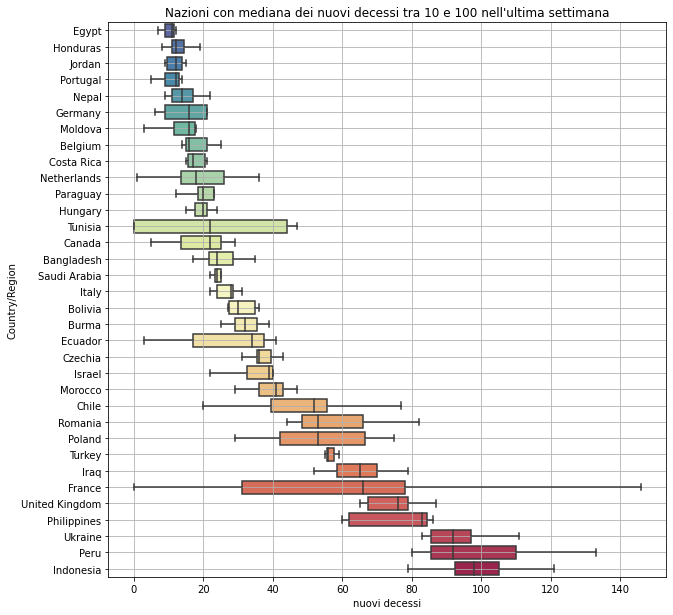

***

# tra 100 e 1000


Nazioni: 10 su 188
(5.3%)
    

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Argentina</th>
      <td>399.0</td>
    </tr>
    <tr>
      <th>Brazil</th>
      <td>729.0</td>
    </tr>
    <tr>
      <th>Colombia</th>
      <td>165.0</td>
    </tr>
    <tr>
      <th>India</th>
      <td>926.0</td>
    </tr>
    <tr>
      <th>Iran</th>
      <td>230.0</td>
    </tr>
    <tr>
      <th>Mexico</th>
      <td>378.0</td>
    </tr>
    <tr>
      <th>Russia</th>
      <td>184.0</td>
    </tr>
    <tr>
      <th>South Africa</th>
      <td>126.0</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>126.0</td>
    </tr>
    <tr>
      <th>US</th>
      <td>705.0</td>
    </tr>
  </tbody>
</table>

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>South Africa</th>
      <td>126.0</td>
    </tr>
    <tr>
      <th>Spain</th>
      <td>126.0</td>
    </tr>
    <tr>
      <th>Colombia</th>
      <td>165.0</td>
    </tr>
    <tr>
      <th>Russia</th>
      <td>184.0</td>
    </tr>
    <tr>
      <th>Iran</th>
      <td>230.0</td>
    </tr>
    <tr>
      <th>Mexico</th>
      <td>378.0</td>
    </tr>
    <tr>
      <th>Argentina</th>
      <td>399.0</td>
    </tr>
    <tr>
      <th>US</th>
      <td>705.0</td>
    </tr>
    <tr>
      <th>Brazil</th>
      <td>729.0</td>
    </tr>
    <tr>
      <th>India</th>
      <td>926.0</td>
    </tr>
  </tbody>
</table>

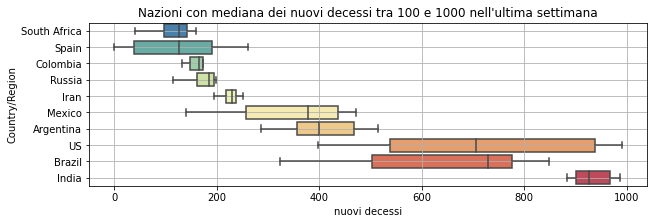

***

# superiore a 1000+


Nazioni: 0 su 188
(0.0%)
    

IN ORDINE per nazione:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
  </tbody>
</table>

IN ORDINE per mediana:


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>value</th>
    </tr>
    <tr>
      <th>Country/Region</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
  </tbody>
</table>

***

In [19]:
nums = [1, 10, 100, 1000, '1000+']

for i, num in enumerate(nums):
    
    if not i:
        continue
    
    if num != '1000+':
        range_txt = f"tra {nums[i-1]} e {num}"
    else:
        range_txt = f"superiore a {num}"
    
    display(Markdown(f"# {range_txt}"))

    _df = ctd_last_week[ctd_last_week['cat']==num].sort_values(by='median')
    
    perc = _df['Country/Region'].unique().size / ctd_last_week['Country/Region'].unique().size
    display(Markdown(f"""
Nazioni: {_df['Country/Region'].unique().size} su {ctd_last_week['Country/Region'].unique().size}
({perc:.1%})
    """))
    
    print("IN ORDINE per nazione:")
    display(Markdown(
        _df.groupby('Country/Region')[['value']].median().sort_values(by='Country/Region').to_html()
    ))
    
    print("IN ORDINE per mediana:")
    display(Markdown(
        _df.groupby('Country/Region')[['value']].median().sort_values(by='value').to_html()
    ))

    if _df.size:
        fig, ax = plt.subplots(figsize=(10, max(2, _df['Country/Region'].unique().size*.3)))

        g = sns.boxplot(
            data=_df,
            orient='h',
            x='value', y='Country/Region',
            palette="Spectral_r",
            showfliers=False,
            ax=ax
        )
        g.set_xlabel("nuovi decessi")
        g.set_title(f"Nazioni con mediana dei nuovi decessi {range_txt} nell'ultima settimana")
        g.grid()
        plt.show()
        plt.close(fig='all')
    
    display(Markdown("***"))